In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

- count len of sentences, words, text, paragraphs

In [2]:
with open("../data/MeganDiss.txt", 'r') as text:
    textfile = text.read()
#     print(textfile)

In [3]:
type(textfile)

str

In [16]:
textfile[1000]

's'

In [21]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_megan = tokenizer.tokenize(textfile)

In [22]:
tokenized_megan[0:10]

['A', 'B', 'S', 'T', 'R', 'A', 'C', 'T', 'T', 'i']

In [23]:
fdist = FreqDist(tokenized_megan)
print(fdist)

<FreqDist with 62 samples and 330445 outcomes>


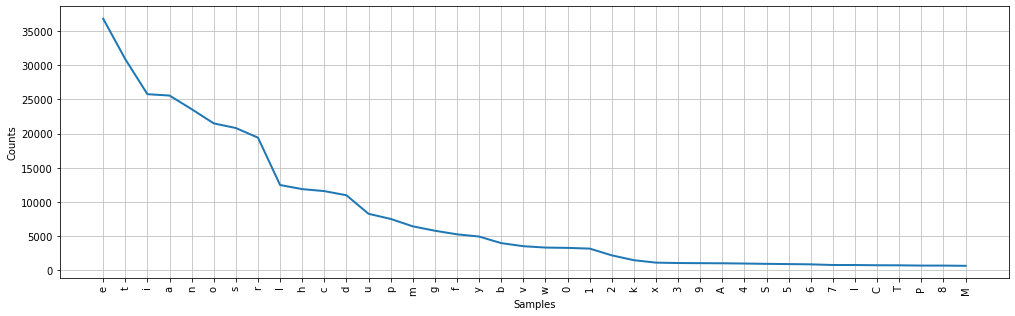

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
plt.figure(figsize=(17,5))
fdist.plot(40)

In [7]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'did', 'does', 'm', 'y', 'further', "doesn't", 'needn', 'its', 'do', 'how', 'couldn', 'themselves', 'more', 'itself', "hadn't", 'which', "wasn't", 'own', 'mustn', 'haven', 'between', 'doing', 'off', 'your', 'most', 'you', 'our', 'has', 'any', 'hasn', 'ma', 'a', "mightn't", 'won', 'each', 'while', 're', 'had', 'who', 'once', 'down', 'below', 'weren', 'were', 'on', "you've", 'why', 'being', 'hadn', 'whom', 'she', 'mightn', 'no', 'ours', 'where', 'they', 'be', 'at', 'too', 'o', 'both', 'he', 've', "shan't", 'i', 'or', 'of', 'when', 'few', 'shouldn', 'wouldn', 'have', 'into', "you're", "should've", 'am', 'didn', 'ourselves', 'such', 'herself', 'out', 's', 'their', 'my', "aren't", 'wasn', "wouldn't", 'an', 'some', 'them', 'shan', 'what', "you'd", 'above', 'only', 'before', 'from', 'don', "didn't", 'doesn', 'are', "hasn't", 'it', 'was', 'if', 'yourself', 'to', 'again', 't', 'these', 'and', "shouldn't", 'as', 'other', "haven't", 'hers', 'there', 'that', 'because', "mustn't", 'by', 'after', '

In [17]:
import string

#adding additional words I don't find to be that valuable
additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u', 'In', 'in', 'The', 'the', 'Ibid', 'A', 'B', 'S', 'T', 'R', 'A', 'C','T', 't','i','t','l','e',
                        'o','f','D','i','s','s','e']

stop_words = stopwords.words('english')

stop_words += list(string.punctuation)

stop_words += additional_stopwords

In [18]:
filtered_review=[]
for w in tokenized_review:
    if w not in stop_words:
        filtered_review.append(w)
# print("Filterd Sentence:",filtered_review)

In [19]:
print(len(tokenized_review))
print(len(filtered_review))

330445
114790


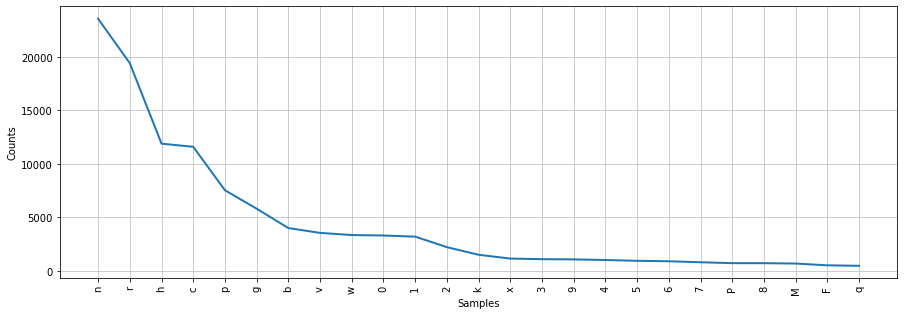

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
fdist = FreqDist(filtered_review)
plt.figure(figsize=(15,5))
fdist.plot(25)

In [12]:
fdist.most_common(25)

[('e', 36795),
 ('n', 23579),
 ('r', 19413),
 ('l', 12488),
 ('h', 11892),
 ('c', 11600),
 ('p', 7536),
 ('g', 5810),
 ('f', 5284),
 ('b', 3998),
 ('v', 3547),
 ('w', 3346),
 ('0', 3302),
 ('1', 3197),
 ('2', 2213),
 ('k', 1500),
 ('x', 1145),
 ('3', 1089),
 ('9', 1068),
 ('4', 1013),
 ('S', 968),
 ('5', 934),
 ('6', 895),
 ('7', 801),
 ('C', 763)]

In [103]:
fdist

FreqDist({'Klan': 132, 'Dale': 91, 'Muncie': 65, 'Middletown': 63, 'Lynds': 58, 'Mecklin': 32, 'public': 30, 'New': 29, 'Indiana': 28, 'American': 25, ...})

In [102]:
type(fdist)

nltk.probability.FreqDist

In [104]:
type(fdist.most_common(25))

list

In [75]:
# from fdist.most_common(25) seperate words and counts
rafi_words = [x[0] for x in fdist.most_common(25)]
print(rafi_words)
rafi_counts = [x[1] for x in fdist.most_common(25)]
print(rafi_counts)

['Klan', 'Dale', 'Muncie', 'Middletown', 'Lynds', 'Mecklin', 'public', 'New', 'Indiana', 'American', 'Dearth', 'Post', 'news', 'York', 'Dewey', 'two', 'paper', 'life', 'Democrat', 'local', 'political', 'city', 'Lynd', 'Court', 'newspapers']
[132, 91, 65, 63, 58, 32, 30, 29, 28, 25, 24, 23, 23, 23, 22, 21, 20, 19, 19, 19, 19, 18, 18, 18, 17]


In [88]:
#figured out how to slice from most common!
most_common_slice = fdist.most_common(100)
# x[26:60]

In [91]:
rafi_words = [x[0] for x in fdist.most_common(100)[26:60]]
print(rafi_words)
rafi_counts = [x[1] for x in fdist.most_common(100)[26:60]]
print(rafi_counts)

['Klux', 'business', 'town', 'George', 'Klansmen', '1927', 'social', 'one', 'Times', 'press', 'members', 'story', 'published', 'politics', 'new', '1920s', 'Robert', 'Supreme', 'journalism', 'class', 'March', 'small', 'court', '1926', 'corruption', 'study', 'democracy', 'As', 'people', 'church', 'Editor', 'Lippmann', 'editor', 'trial']
[17, 17, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 14, 14, 14, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11]


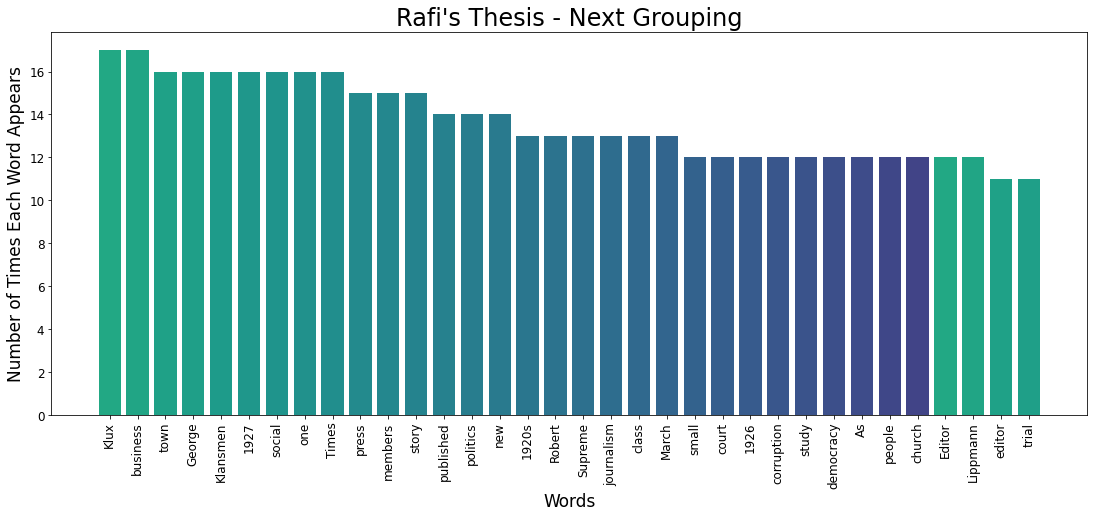

In [92]:
fig, ax = plt.subplots(1,1, figsize=(15,7))

# matplotlib bar plot
ax.bar(rafi_words, rafi_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Number of Times Each Word Appears', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Rafi's Thesis - Next Grouping", fontsize = 24)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up

# plt.savefig('graphs/rafi.png')

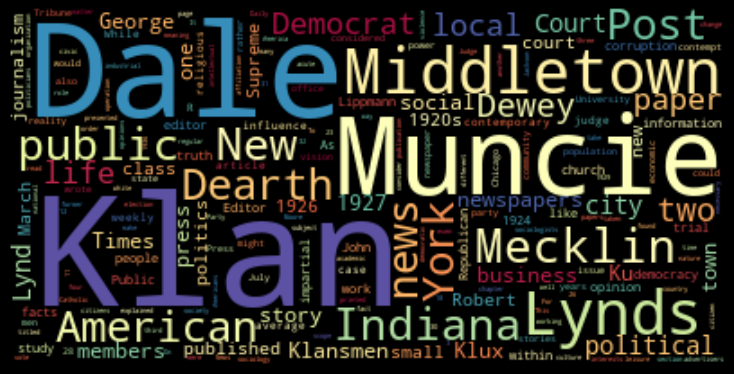

In [95]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [55]:
# implementing it in python
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts

vec = CountVectorizer(stop_words=None)
X = vec.fit_transform([textfile])


df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df

,00,000,10,100,103,104,106,107,109,11,...,yields,york,yorker,you,young,your,youths,zeitgeist,œcommon,œcompact
0,1,3,4,2,1,2,1,2,1,5,...,1,23,2,1,4,1,1,1,1,1


In [76]:
# df.index

RangeIndex(start=0, stop=1, step=1)

In [56]:
# df.columns

In [78]:
# df1 = df.stack()

In [52]:
# df.unstack()

In [61]:
pd.options.display.max_seq_items = None
# df.columns

In [57]:
df = df.transpose()

In [58]:
df.head()

,0
00,1
000,3
10,4
100,2
103,1


In [65]:
df = df.reset_index()

In [71]:
df[0].sort_values(ascending=False)

2486    854
1784    492
286     330
1311    245
2528    210
       ... 
1638      1
1639      1
1640      1
1641      1
0         1
Name: 0, Length: 2784, dtype: int64

In [89]:
df = df.reset_index()

In [73]:
# df.rename(columns={'index':'word'})

In [90]:
df.columns

Index(['index', 0], dtype='object')

In [91]:
df['index']

0              00
1             000
2              10
3             100
4             103
          ...    
2779         your
2780       youths
2781    zeitgeist
2782      œcommon
2783     œcompact
Name: index, Length: 2784, dtype: object

In [96]:
df_g = df.groupby(['index']).nunique()

In [100]:
df_g.reset_index()

,index,0
0,00,1
1,000,1
2,10,1
3,100,1
4,103,1
...,...,...
2779,your,1
2780,youths,1
2781,zeitgeist,1
2782,œcommon,1


In [101]:
df_g[df_g[0] > 2]

,0
index,
